In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from envs.CartPole import CartPole
from infrastructure.buffer import ReplayBuffer
from utils.util import build_network, pendulum_plot
from agents.ddpg_agent import DDPGAgent
from learners.ddpg_learner import DDPGLearner

In [3]:
def plot(traj, us, costs):
      plt.plot([x[0] for x in traj], label="x")
      plt.plot([x[1] for x in traj], label="theta")
      plt.legend(loc="upper right")
      plt.title("State Sequence")
      plt.show()

      plt.plot([u[0] for u in us], label="u")
      plt.legend(loc="upper right")
      plt.ylim(-10, 10)
      plt.title("Control Sequence")
      plt.show()

      plt.plot(costs, label="cost")
      plt.legend(loc="upper right")
      plt.title("Cost Sequence")
      plt.show()

In [4]:
mc = 5.0
mp = 1.0
l = 1.0

env = CartPole(mc, mp, l)
buffer = ReplayBuffer(10**5)

n_states = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]

q_network = build_network(n_states+n_actions, 1, 3, 400)
p_network = build_network(n_states, n_actions, 3, 400, (-10, 10))
pg = DDPGAgent(q_network, p_network, 0.99, 0.001, 1e-4, 1e-4)

[autoreload of tensorflow.python.keras.layers.core failed: Traceback (most recent call last):
  File "/home/pengbo/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/pengbo/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/pengbo/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/pengbo/anaconda3/lib/python3.7/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module utils.util not in sys.modules
]


Start pre-sampling with random policy...
Pre-sampling finished!
Episode: 0, Mean Cost: 16.46916040805788


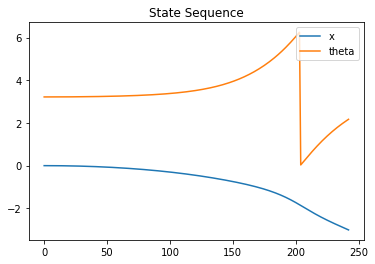

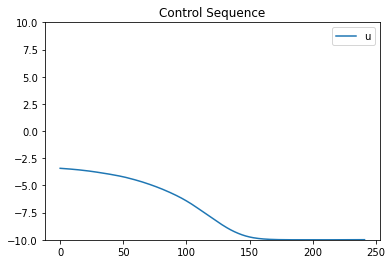

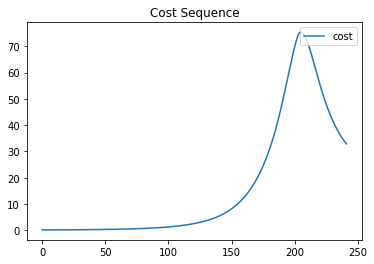

Episode: 10, Mean Cost: 16.912077256459316


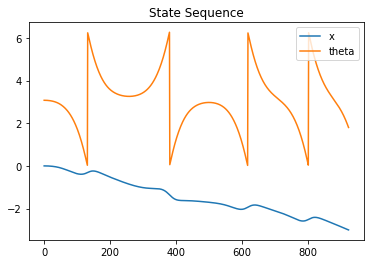

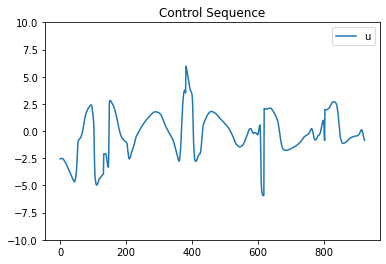

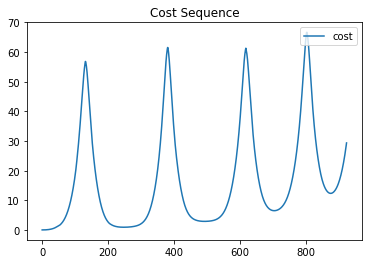

Episode: 20, Mean Cost: 16.06052960709278


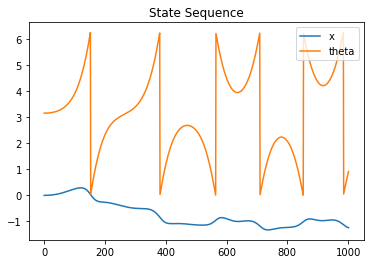

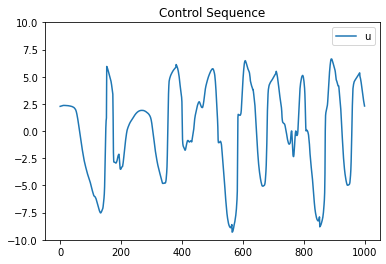

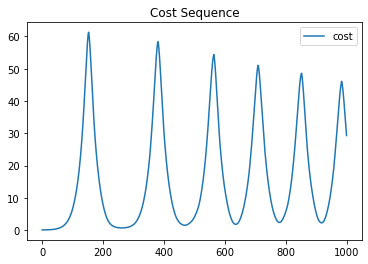

Episode: 30, Mean Cost: 15.774493031023217


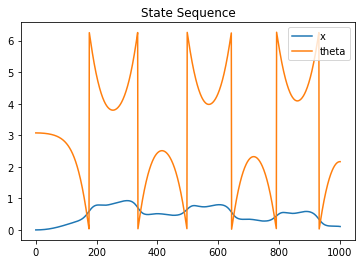

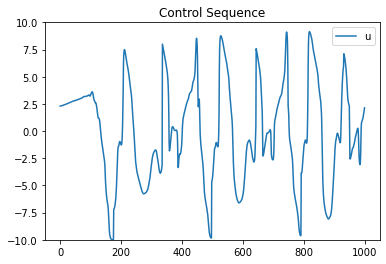

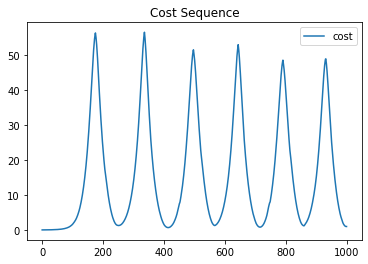

Episode: 40, Mean Cost: 13.974461531729522


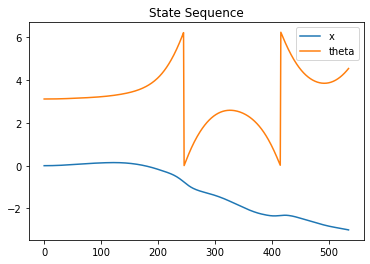

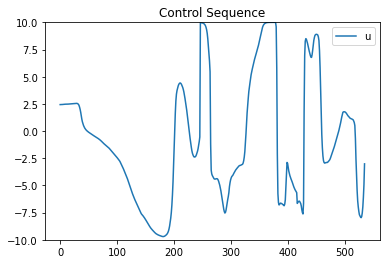

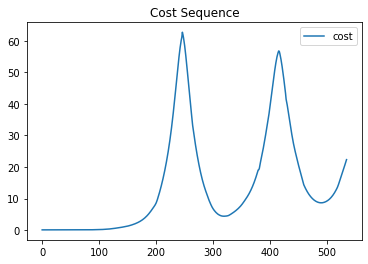

Episode: 50, Mean Cost: 16.538591949843486


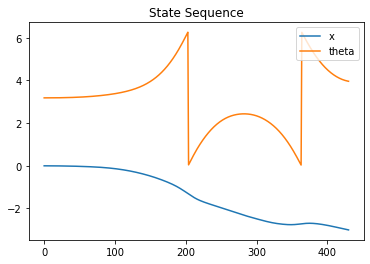

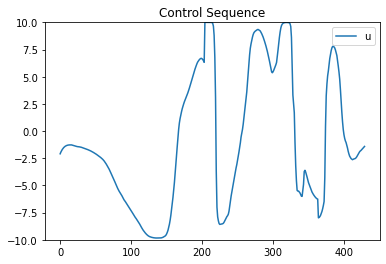

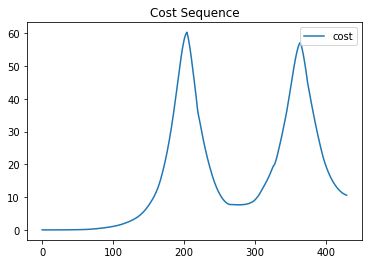

Episode: 60, Mean Cost: 18.833977118657167


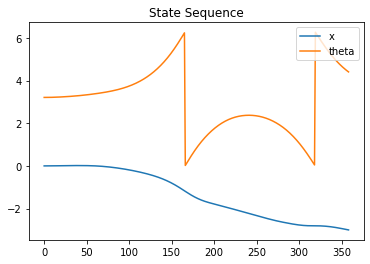

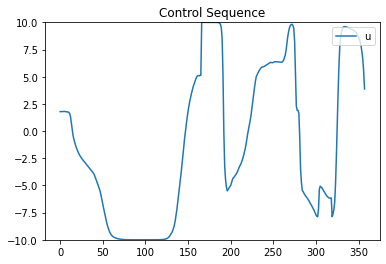

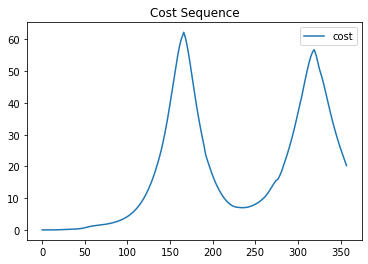

Episode: 70, Mean Cost: 11.030417627268351


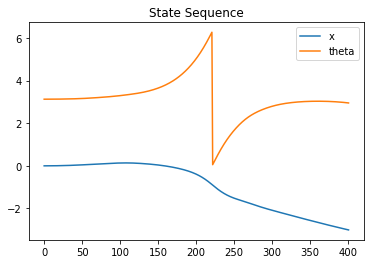

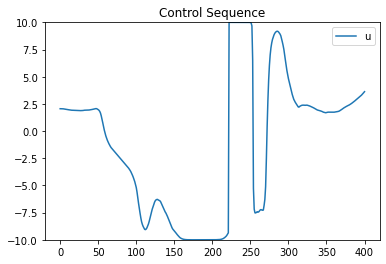

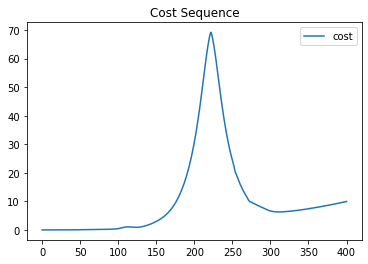

Episode: 80, Mean Cost: 16.727217006798107


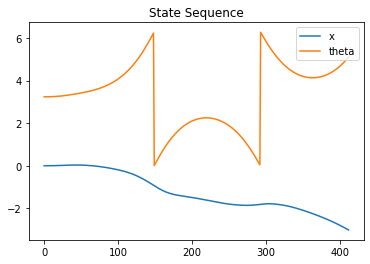

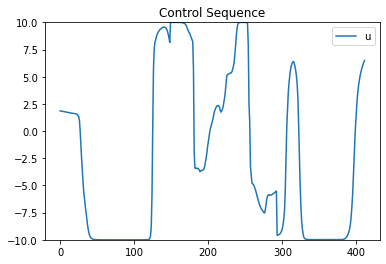

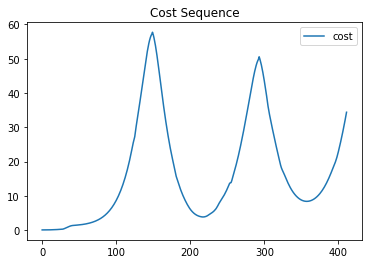

Episode: 90, Mean Cost: 16.187245218402182


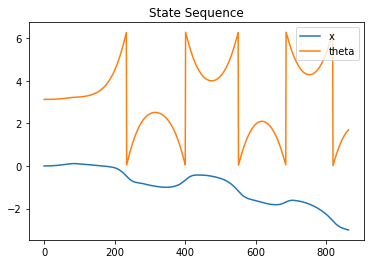

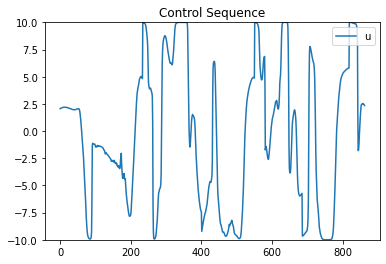

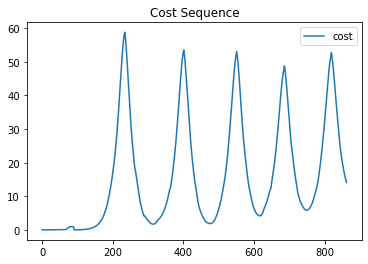

Episode: 100, Mean Cost: 18.13159610909809


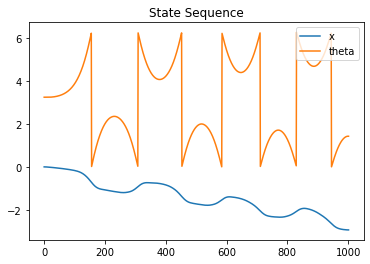

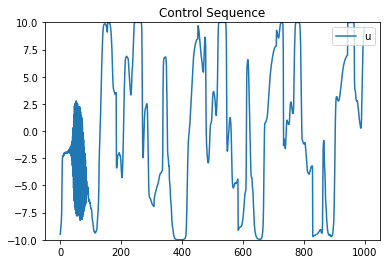

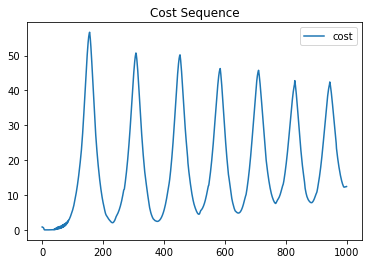

Episode: 110, Mean Cost: 15.034087213813297


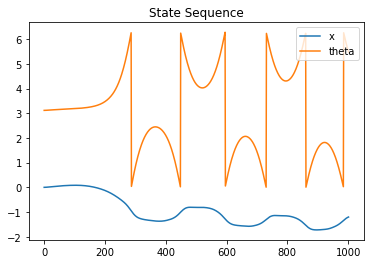

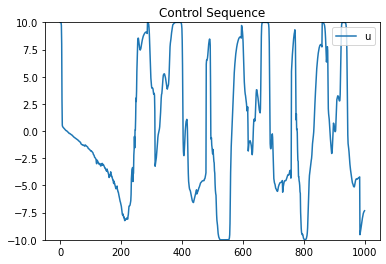

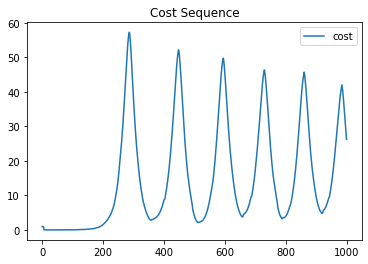

Episode: 120, Mean Cost: 16.502805998064392


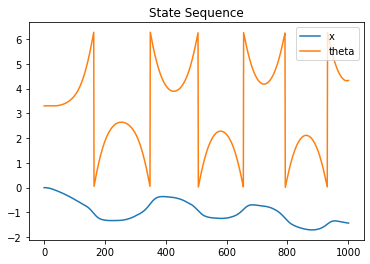

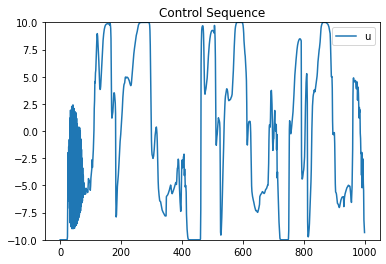

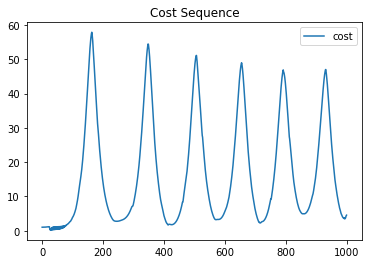

Episode: 130, Mean Cost: 15.419033282118905


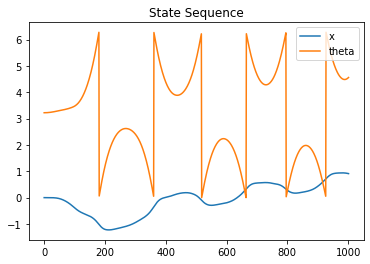

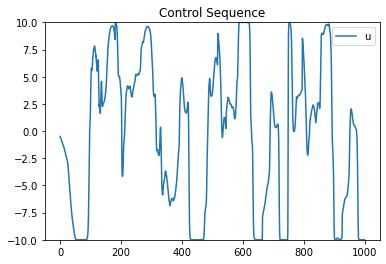

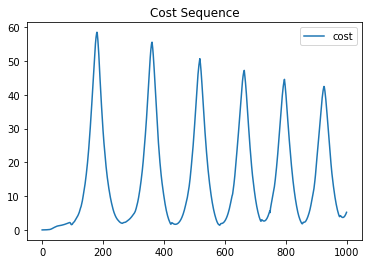

Episode: 140, Mean Cost: 13.331568193804415


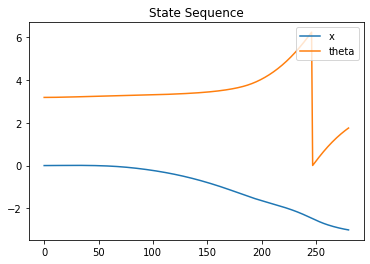

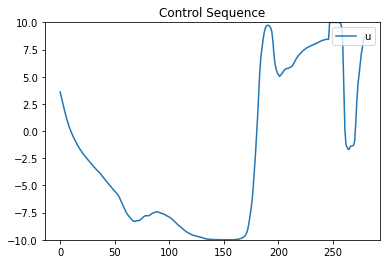

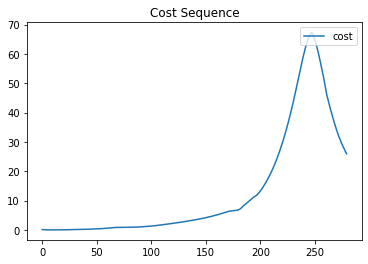

Episode: 150, Mean Cost: 11.247684671808697


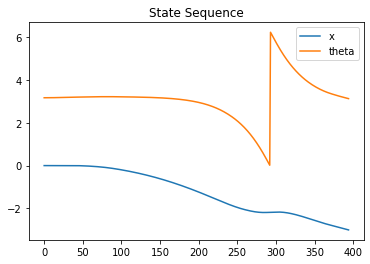

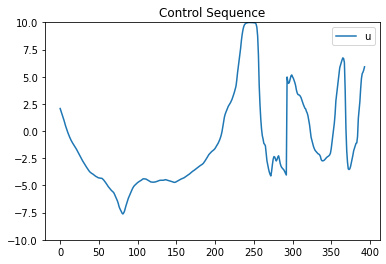

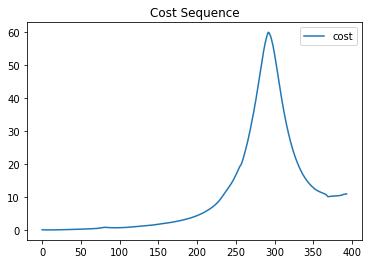

Episode: 160, Mean Cost: 11.540607648916986


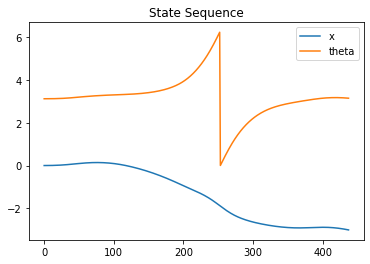

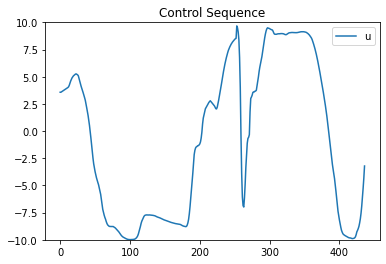

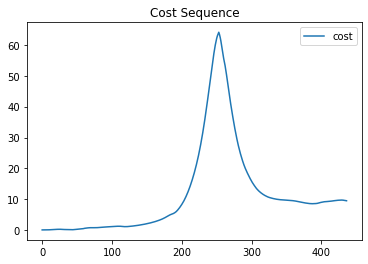

Episode: 170, Mean Cost: 18.618990522357986


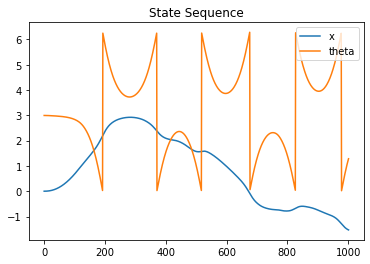

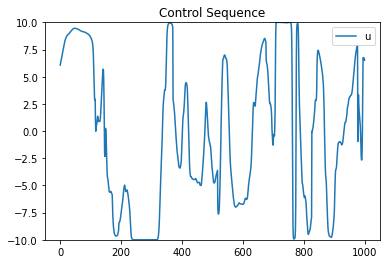

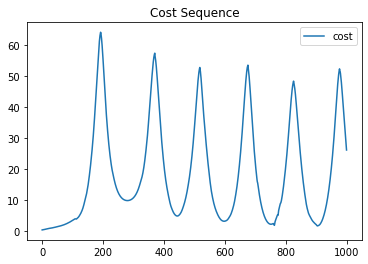

Episode: 180, Mean Cost: 4.364321468878492


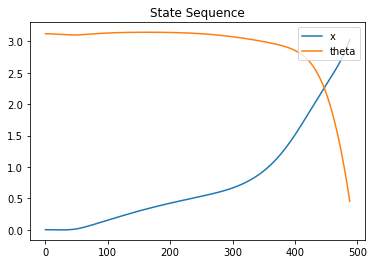

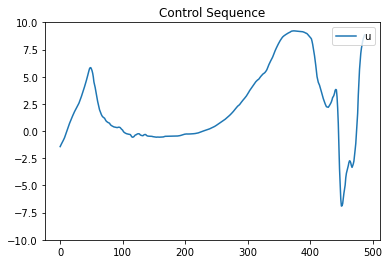

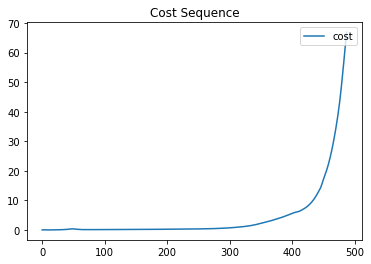

Episode: 190, Mean Cost: 16.165727354161206


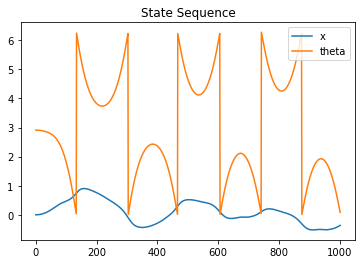

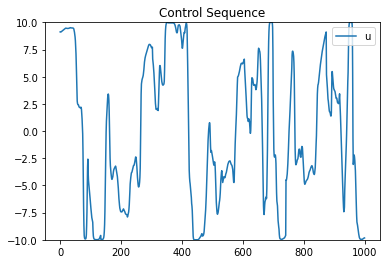

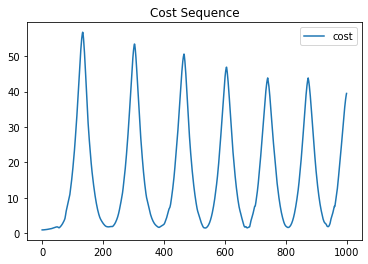

Episode: 200, Mean Cost: 3.5057675757876217


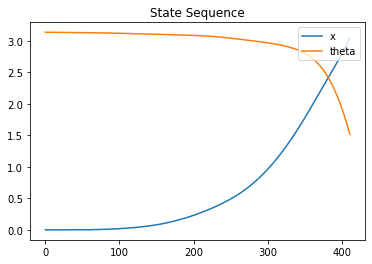

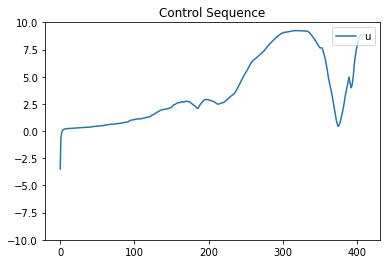

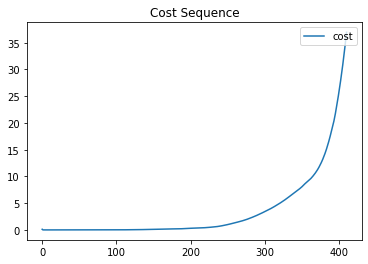

Episode: 210, Mean Cost: 12.233345872396857


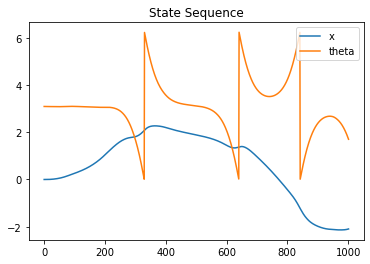

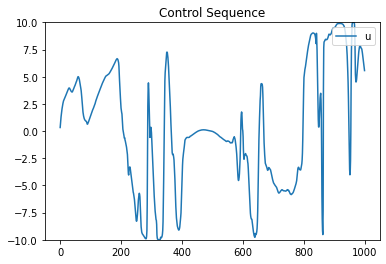

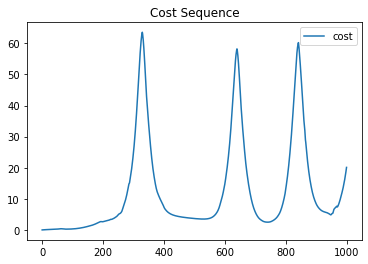

Episode: 220, Mean Cost: 3.1932507757750748


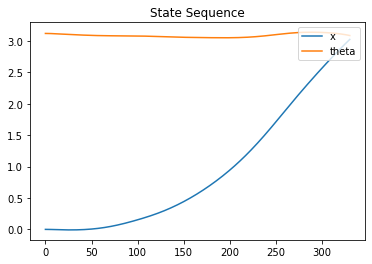

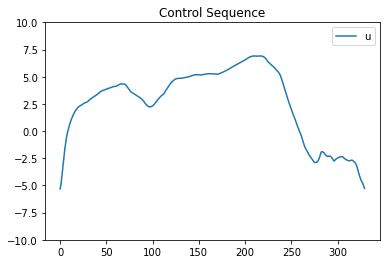

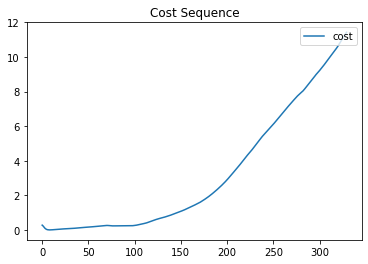

Episode: 230, Mean Cost: 2.997565518391657


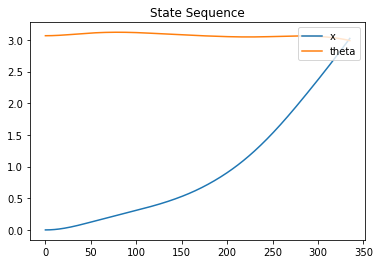

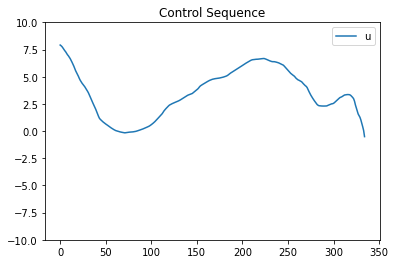

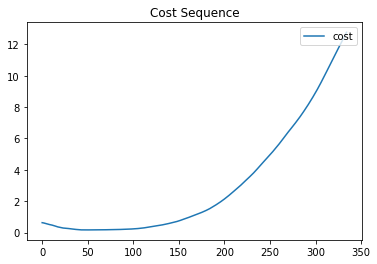

Episode: 240, Mean Cost: 3.8947347144965097


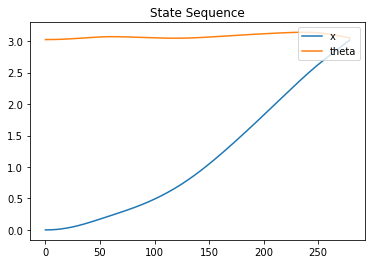

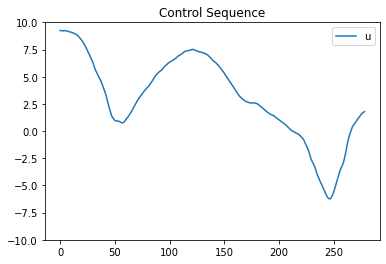

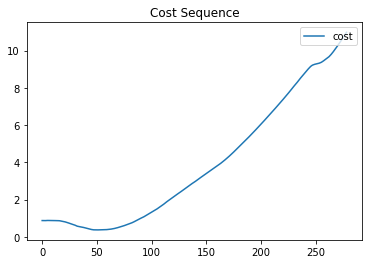

Episode: 250, Mean Cost: 4.860610009267753


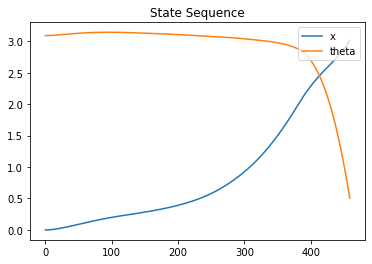

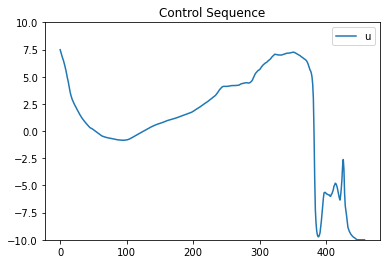

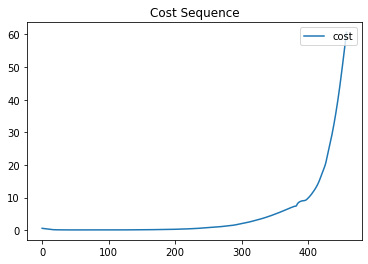

Episode: 260, Mean Cost: 21.597521634548777


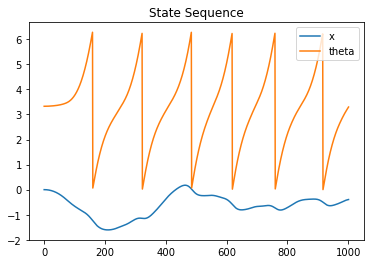

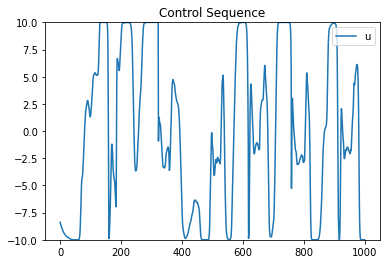

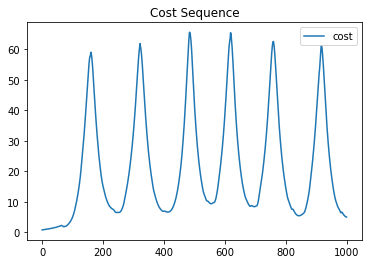

Episode: 270, Mean Cost: 3.7731793381746046


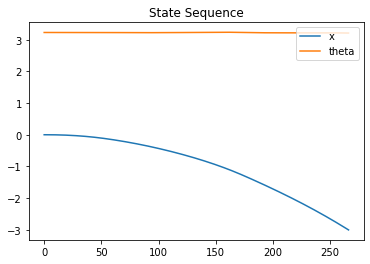

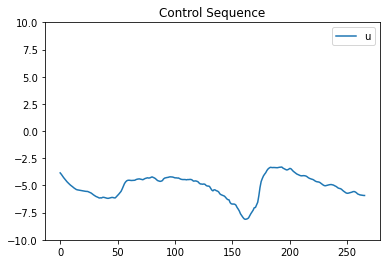

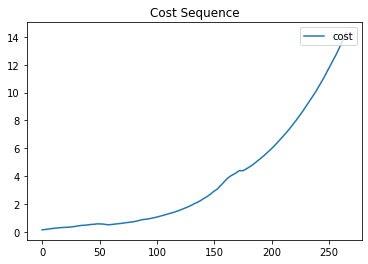

Episode: 280, Mean Cost: 14.403853869019777


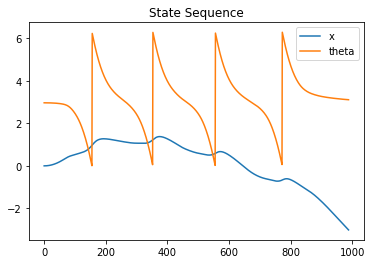

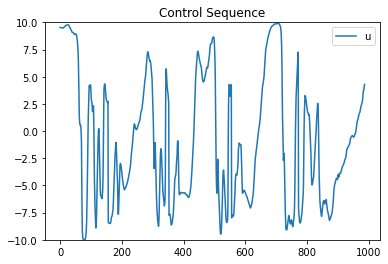

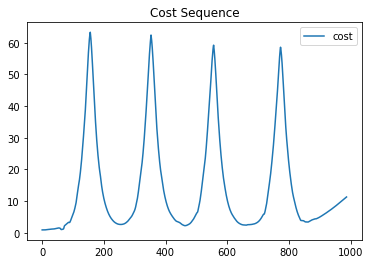

Episode: 290, Mean Cost: 3.1029541960298364


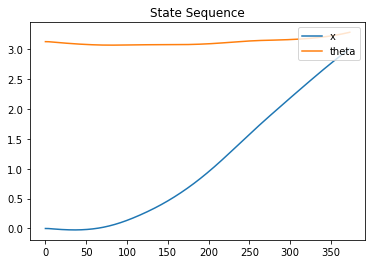

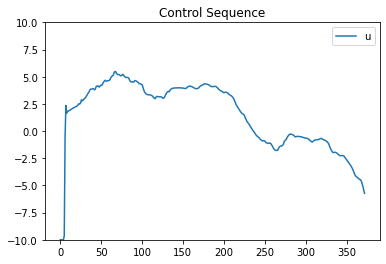

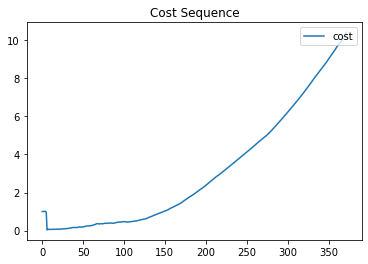

Episode: 300, Mean Cost: 3.696267724994186


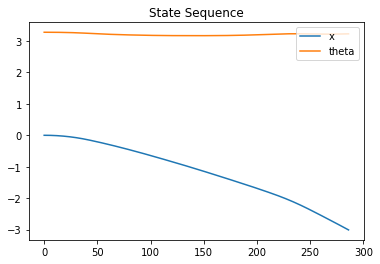

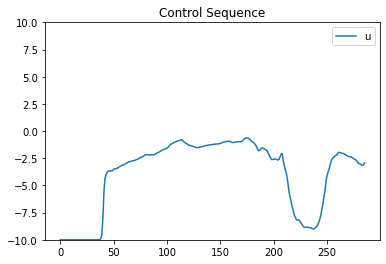

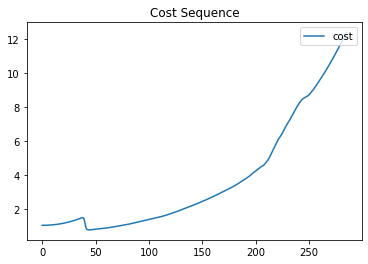

Episode: 310, Mean Cost: 12.127251597760393


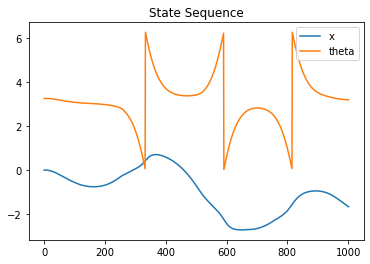

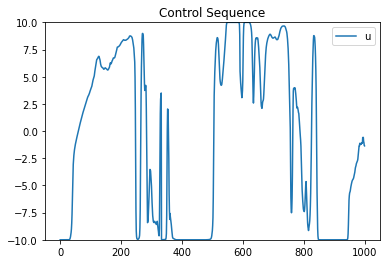

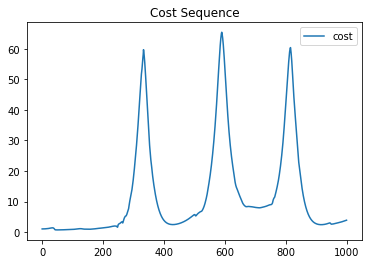

Episode: 320, Mean Cost: 3.275510036478166


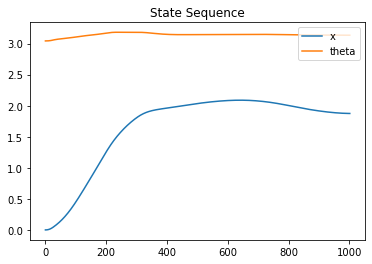

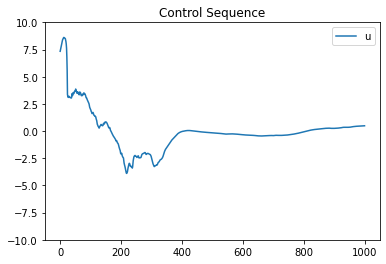

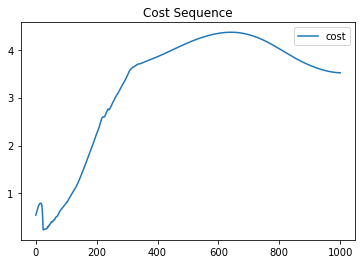

Episode: 330, Mean Cost: 11.827571826372923


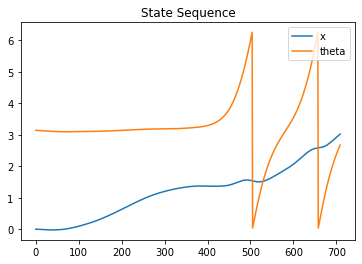

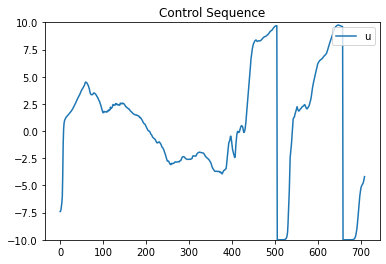

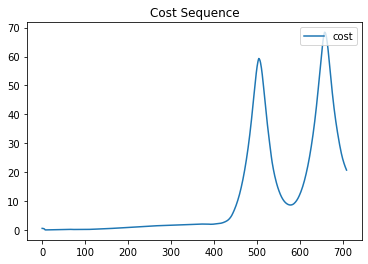

Episode: 340, Mean Cost: 5.9383140304248005


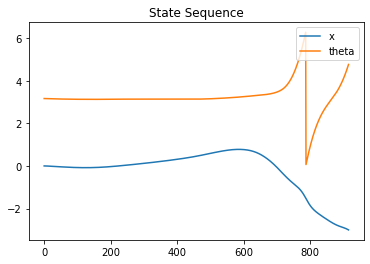

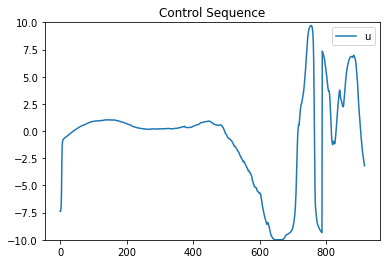

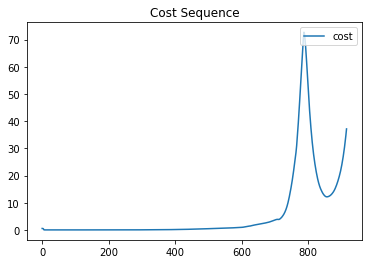

Episode: 350, Mean Cost: 0.0035178855792092857


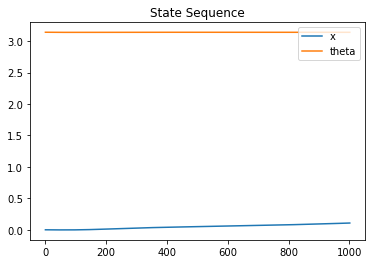

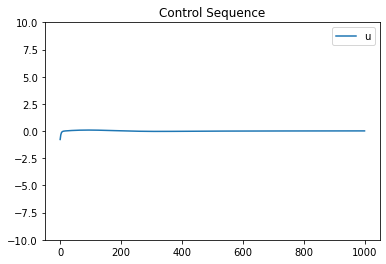

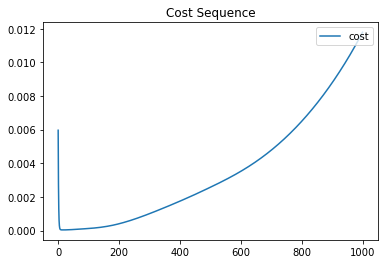

Episode: 360, Mean Cost: 6.418794761971773


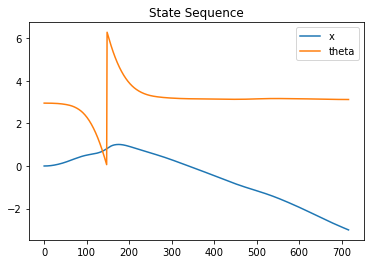

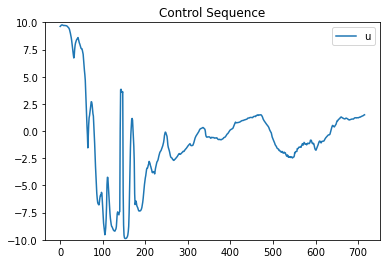

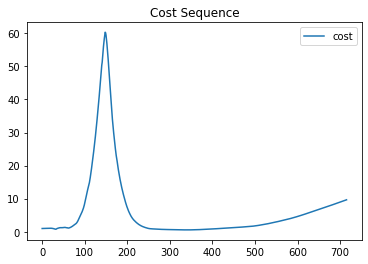

Episode: 370, Mean Cost: 5.307043803600125


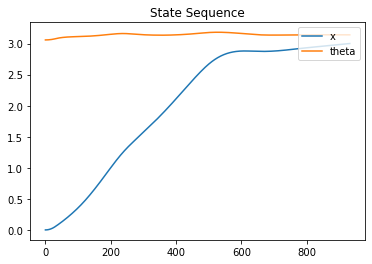

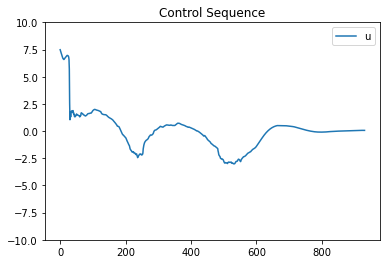

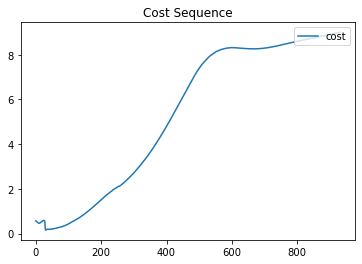

Episode: 380, Mean Cost: 6.1034151956073845


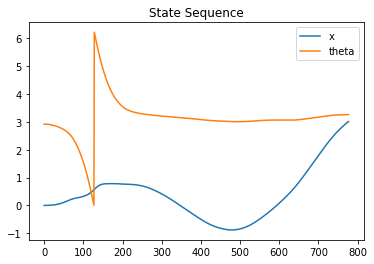

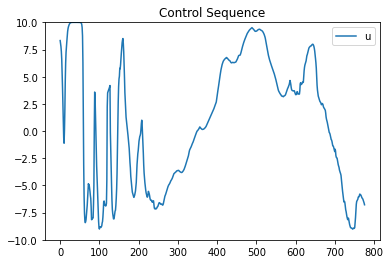

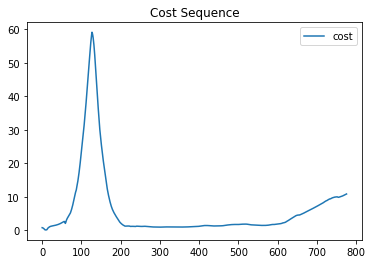

Episode: 390, Mean Cost: 0.6424639921869505


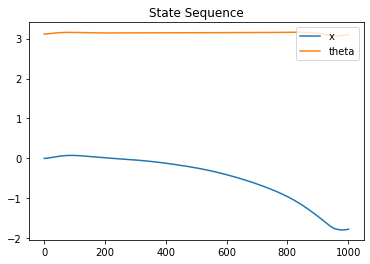

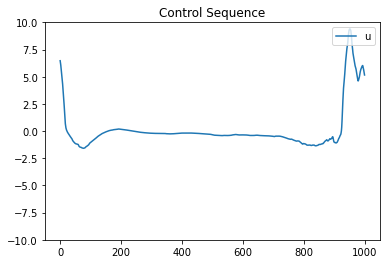

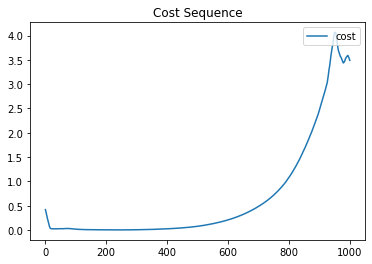

Episode: 400, Mean Cost: 6.86180856480978


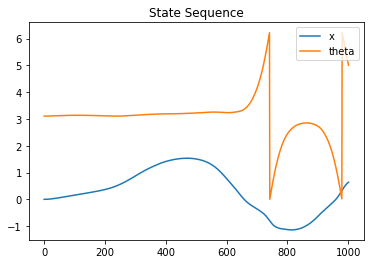

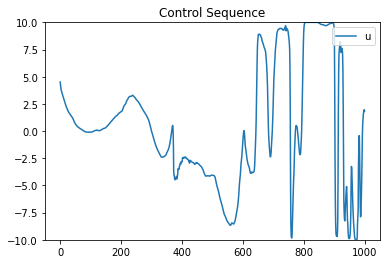

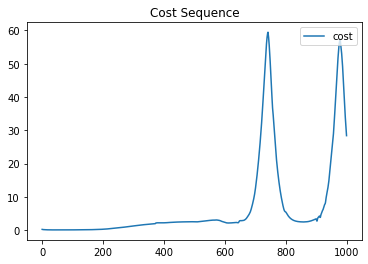

Episode: 410, Mean Cost: 0.6799168824400319


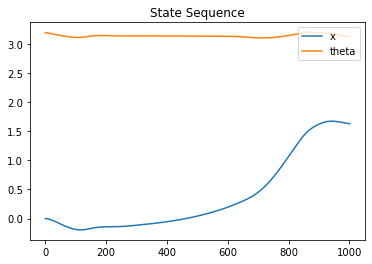

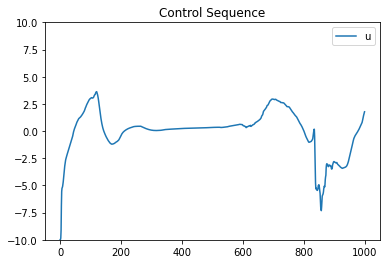

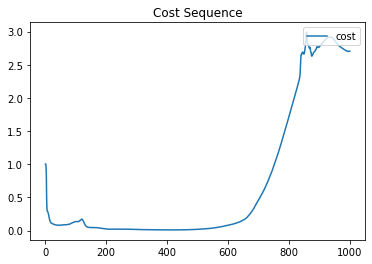

Episode: 420, Mean Cost: 8.42943678460723


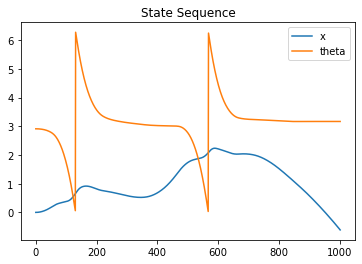

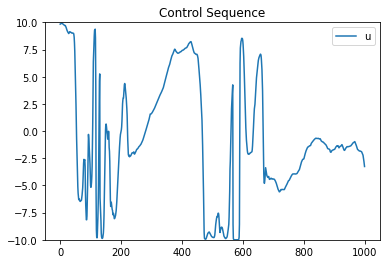

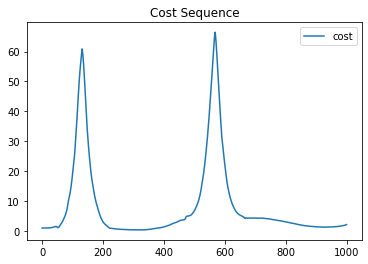

Episode: 430, Mean Cost: 1.7278902805217482


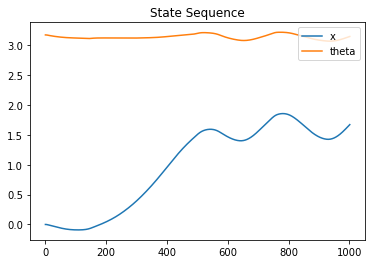

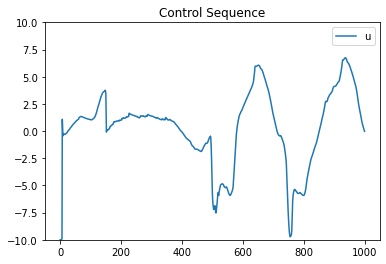

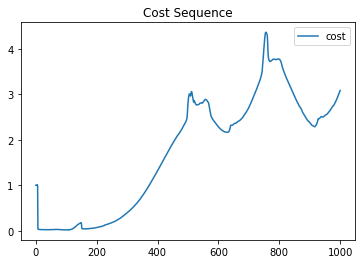

Episode: 440, Mean Cost: 5.570431193942048


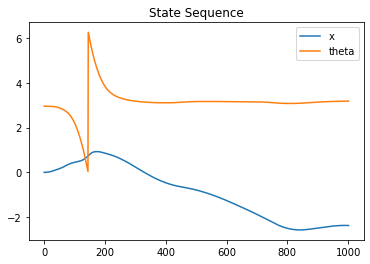

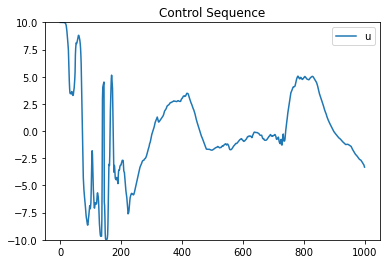

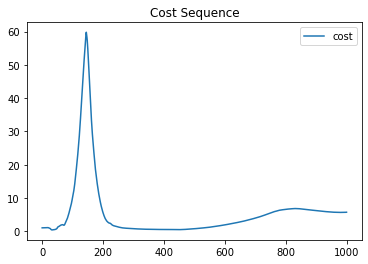

Episode: 450, Mean Cost: 7.646168819657525


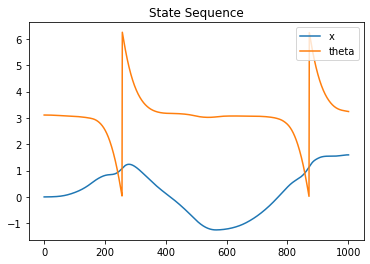

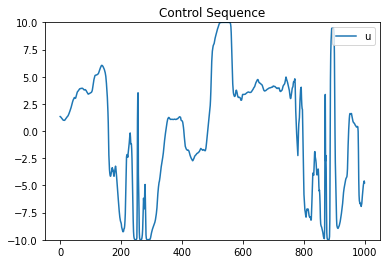

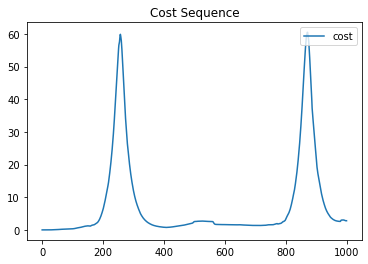

Episode: 460, Mean Cost: 10.75798446336806


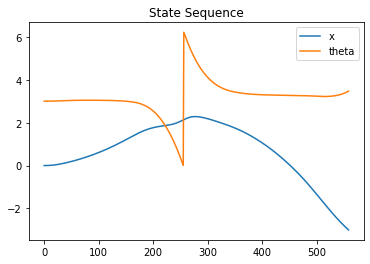

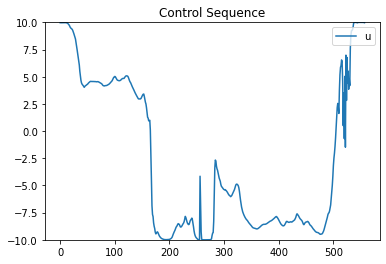

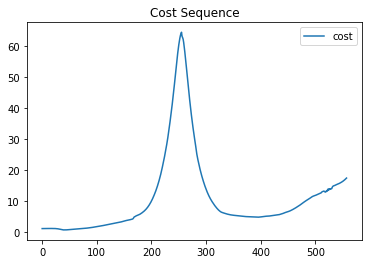

Episode: 470, Mean Cost: 4.179632741522506


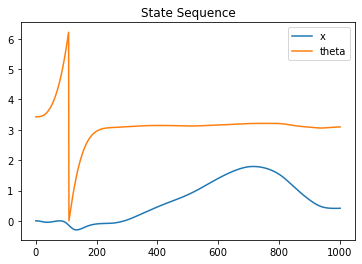

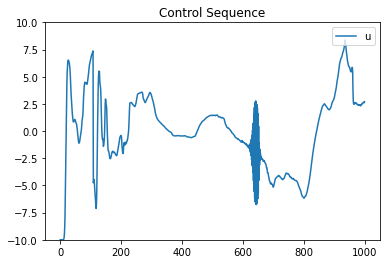

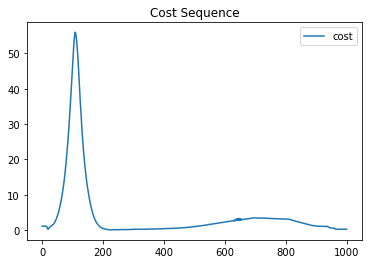

Episode: 480, Mean Cost: 0.7601184637627345


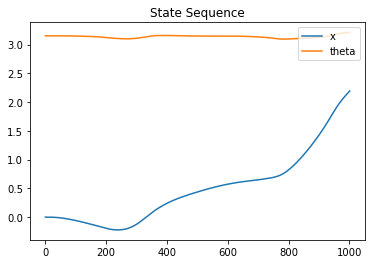

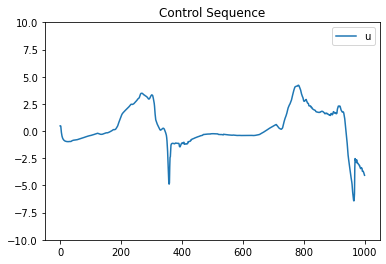

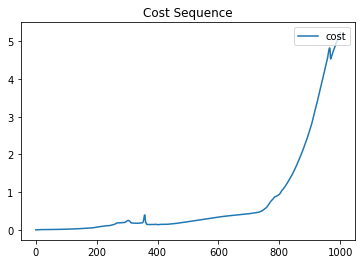

Episode: 490, Mean Cost: 1.8597513623432267


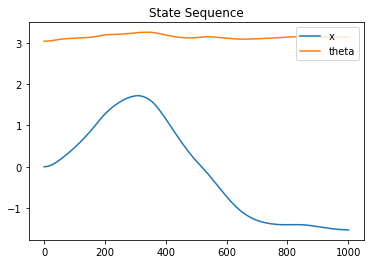

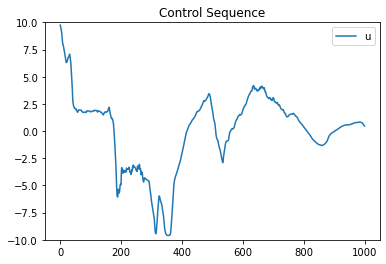

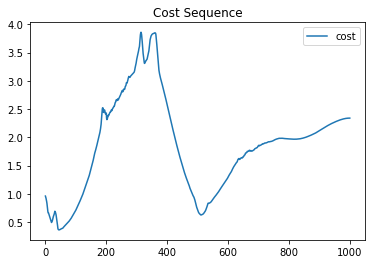

Training finished!


In [5]:
trainer = DDPGLearner(env, buffer, pg, use_cost=False)
trainer.train(presample=100, noise_scale=10.0, episodes=500, interval=10, plot=plot)

In [6]:
trainer.sample_trail(trainer.agent)

[autoreload of tensorflow.python.keras.layers.core failed: Traceback (most recent call last):
  File "/home/pengbo/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/pengbo/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/pengbo/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/pengbo/anaconda3/lib/python3.7/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module utils.util not in sys.modules
]


AttributeError: 'DDPGLearner' object has no attribute 'maximize'

In [18]:
p_network.save('p_network.h5')

In [19]:
p = tf.keras.models.load_model("p_network.h5")